In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import panel as pn
from rdkit import Chem
from rdkit import RDPaths
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pn.extension()


RDKit WARNING: [17:03:03] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
sdf = os.path.join(RDPaths.RDDocsDir, 'Book/data/cdk2.sdf')
mols = [m for m in Chem.SDMolSupplier(sdf)]
for m in mols:
    AllChem.Compute2DCoords(m)

Column
    [0] IntSlider(end=47)
    [1] ParamFunction(function)
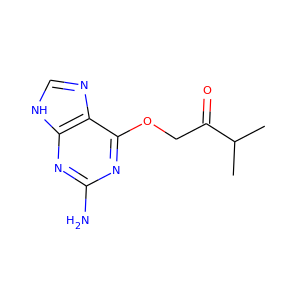

In [4]:
pn.extension()
slider = pn.widgets.IntSlider(start=0, end=len(mols), step=1, value=0)
@pn.depends(slider.param.value)
def callback(value):
    return Draw.MolToImage(mols[value])
row = pn.Column(slider, callback)
row

Column
    [0] IntRangeSlider(end=47, value=(0, 47))
    [1] ParamFunction(function)
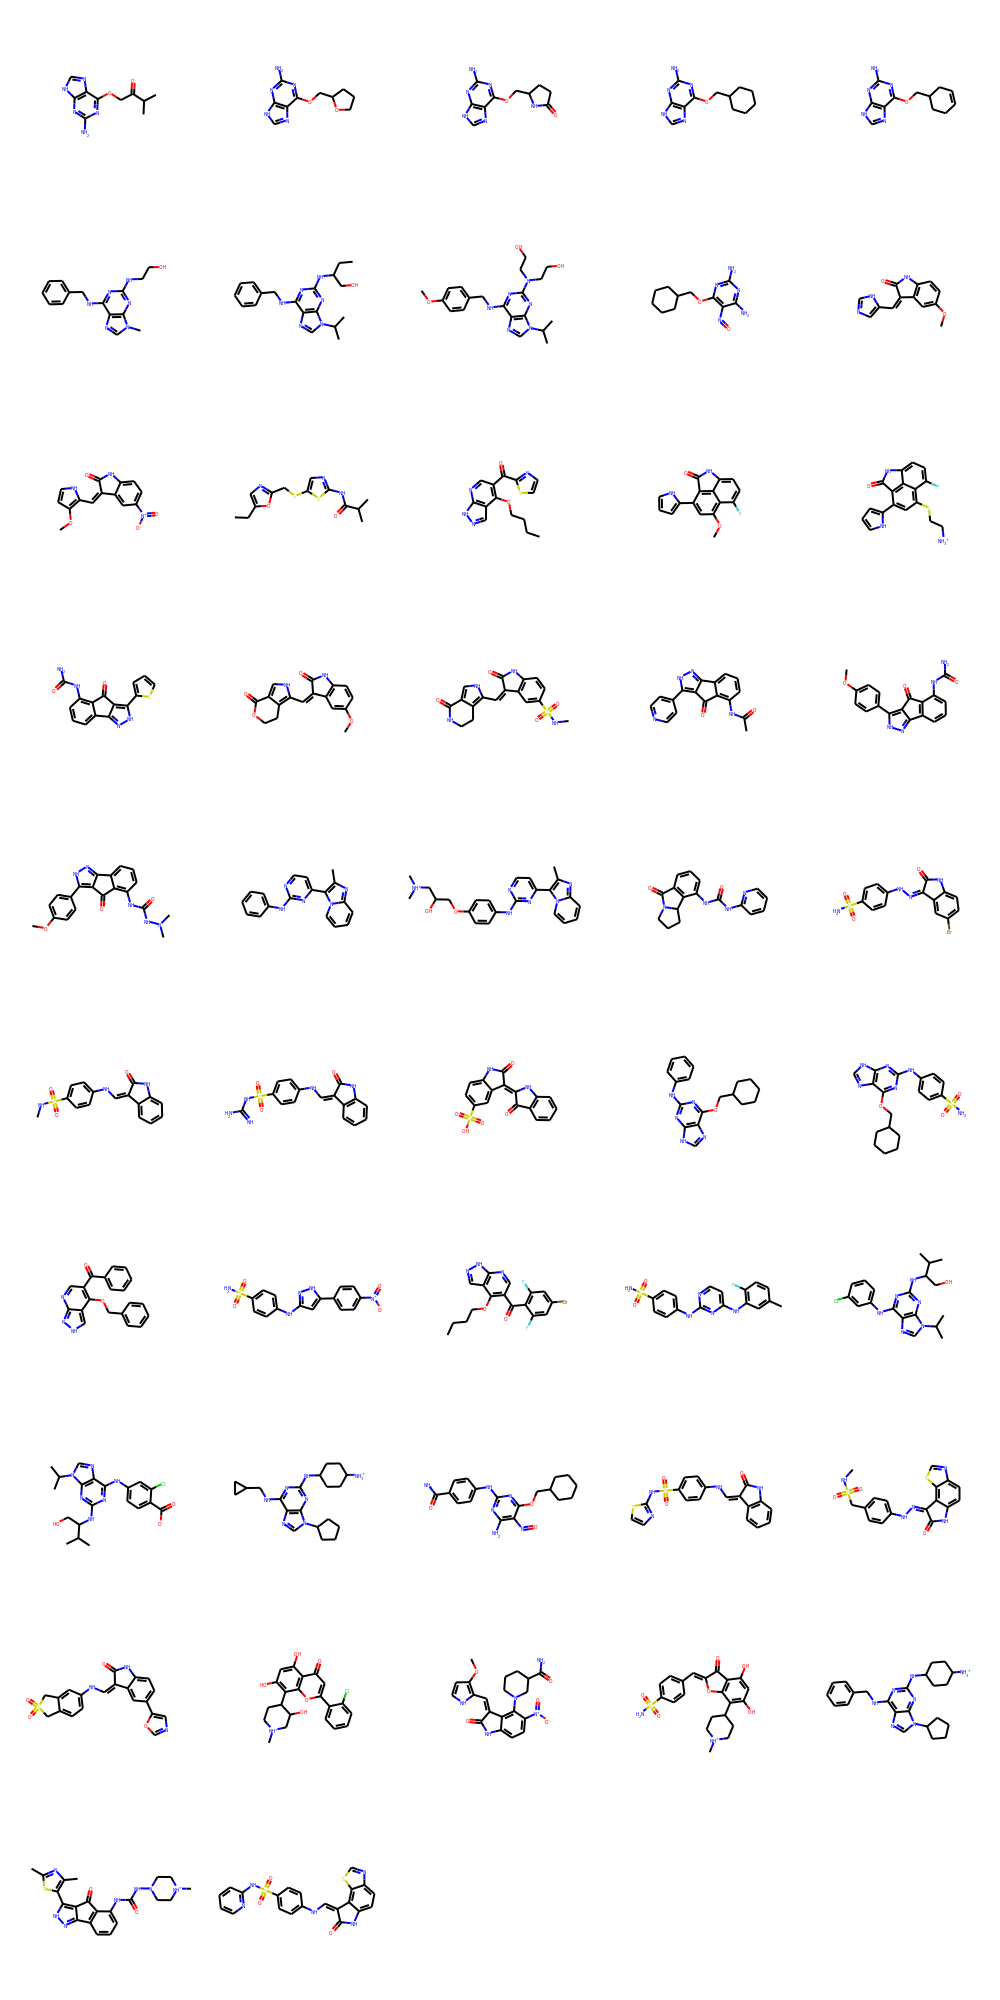

In [5]:
pn.extension()
rangeslider = pn.widgets.IntRangeSlider(start=0, end=len(mols), step=1)
@pn.depends(rangeslider.param.value)
def callback(value):
    return Draw.MolsToGridImage(mols[value[0]: value[1]], molsPerRow=5)
pn.Column(rangeslider, callback)

In [6]:
from rdkit.Chem import Descriptors
from collections import defaultdict

In [7]:
dlist = Descriptors._descList

In [8]:
desc_dec = defaultdict(list)

In [9]:
for mol in mols:
    for k, f  in dlist:
        desc_dec[k].append(f(mol))

In [10]:
df = pd.DataFrame(desc_dec)

In [11]:
df.head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       11.447549       -0.079760          11.447549           0.008454   
1        5.603750        0.139057           5.603750           0.139057   
2       11.060330        0.016372          11.060330           0.016372   
3        5.784306        0.213328           5.784306           0.213328   
4        5.750417        0.199343           5.750417           0.199343   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.800424  235.247         222.143  235.106925                   90   
1  0.802943  235.247         222.143  235.106925                   90   
2  0.679158  248.246         236.150  248.102174                   94   
3  0.864055  247.302         230.166  247.143310                   96   
4  0.802670  245.286         230.166  245.127660                   94   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                    0  ...           0             0           0   
1                    0  ...           0             0           0   
2                    0  ...           0             0           0   
3                    0  ...           0             0           0   
4                    0  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0             0   
1                  0             0            0            0             0   
2                  0             0            0            0             0   
3                  0             0            0            0             0   
4                  0             0            0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  

[5 rows x 200 columns]

Column
    [0] Row
        [0] Select(name='x_', options=['MaxEStateIndex', ...], value='MolWt')
        [1] Select(name='y_', options=['MaxEStateIndex', ...], value='qed')
        [2] FloatSlider(name='alpha', value=0.5)
    [1] ParamFunction(function)
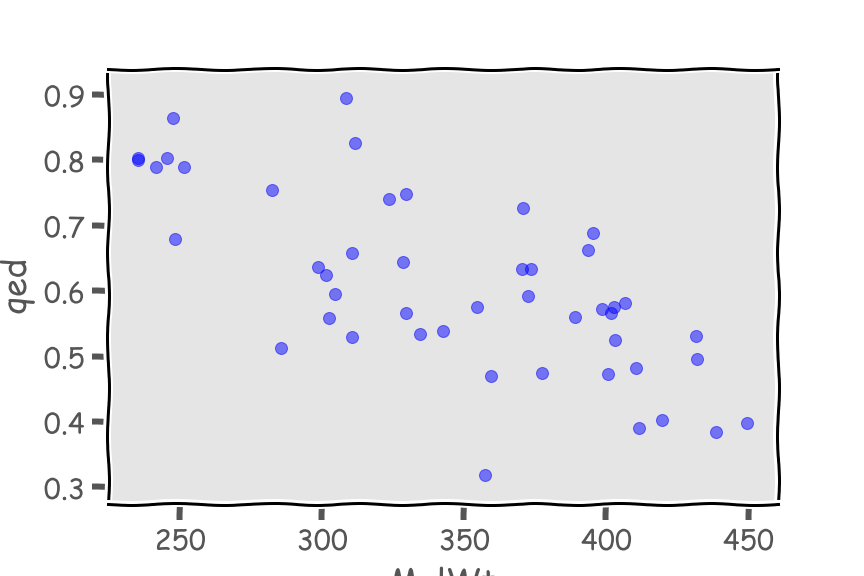

In [12]:
from matplotlib.figure import Figure, FigureCanvasBase
columns = df.columns.to_list()
x = pn.widgets.Select(options=columns, name='x_', value='MolWt')
y = pn.widgets.Select(options=columns, name='y_', value='qed')
alpha = pn.widgets.FloatSlider(name='alpha', value=0.5)

@pn.depends(x.param.value, y.param.value, alpha.param.value)
def get_plot(x_v, y_v, a):
    with plt.xkcd():
        fig = Figure()
        ax = fig.subplots()
        FigureCanvasBase(fig)
        ax.set_xlabel(x_v)
        ax.set_ylabel(y_v)
        ax.scatter(df[x_v], df[y_v], c='blue', alpha = a)
        #fig = df.plot.scatter(x_v, x_v)
        return fig
pn.Column(pn.Row(x, y, alpha), get_plot)